In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
base = pd.read_csv('dados/Eleicao.csv', sep=";")

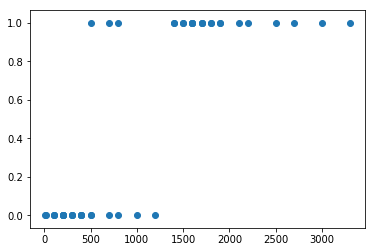

In [3]:
plt.scatter(base.DESPESAS, base.SITUACAO)

In [4]:
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [5]:
#correlação
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [6]:
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
Y = base.iloc[:, 1].values

In [7]:
#criação do modelo
modelo = LogisticRegression()
modelo.fit(X,Y)

c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
print(modelo.intercept_)
print(modelo.coef_)

[-2.41847443]
[[0.00298895]]


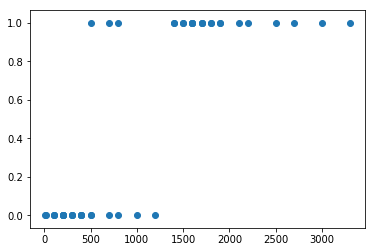

In [9]:
plt.scatter(X,Y)

In [11]:
X_teste = np.linspace(10, 3400, 100)

In [12]:
def model(x):
    return 1 / (1 + np.exp(-x))

In [13]:
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()

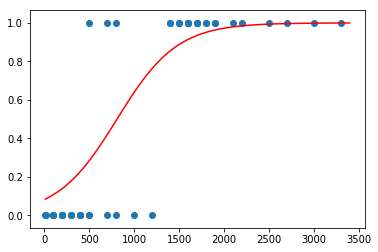

In [15]:
plt.scatter(X,Y)
plt.plot(X_teste, r, color='red')

In [16]:
base_previsoes = pd.read_csv('dados/NovosCandidatos.csv', sep=';')
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

In [18]:
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 1],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)